**временные ряды и модели авторегрессии**

Евгений Борисов <esborisov@sevsu.ru>

-----

Дмитрий Макаров   Временные ряды.    
https://www.dmitrymakarov.ru/intro/time-series-20/

Евгений Рябенко Прогнозирование временных рядов.     
https://www.youtube.com/watch?v=u433nrxdf5k

-----

#  загружаем данные

In [1]:
import numpy as np
from numpy import random as rng
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# # Data from Google Finance

# from pandas_datareader.data import DataReader
# # df = DataReader("AAPL", "stooq")
# # df = DataReader("GS", "stooq") 
# df = DataReader("IBM", 'stooq')
# df = df.sort_index()
# df = df[['Close']].rename(columns={'Close':'values'})

__monthly totals of a US airline passengers from 1949 to 1960__

In [3]:
# AirPassengers.csv :
#    https://drive.google.com/file/d/1yfw6gcgmJXCtxkjC69ekUvsEtAiYTlST/view?usp=share_link
#    https://huggingface.co/spaces/Anniek/Time_series_forecast/raw/main/AirPassengers.csv

url = 'https://huggingface.co/spaces/Anniek/Time_series_forecast/raw/main/AirPassengers.csv'
df = pd.read_csv(url).convert_dtypes()

df['date'] = pd.to_datetime(df['Month'])
df = df.set_index('date')
df = df.asfreq('MS')
df = df[['#Passengers']].rename(columns={'#Passengers':'values'})

In [4]:
display(df.sample(3))

,values
date,
1959-12-01,405
1952-12-01,194
1949-10-01,119


# анализ данных

__1. визуальная оценка данных__

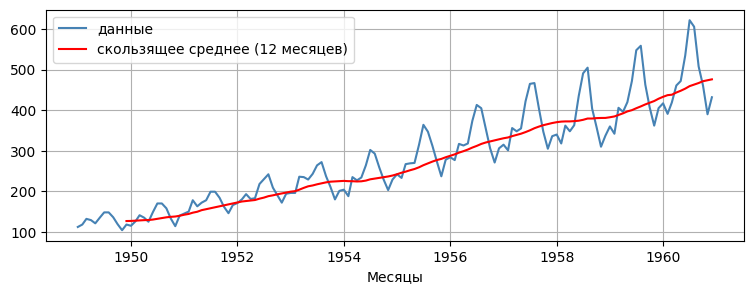

In [5]:
fig,ax = plt.subplots(figsize = (9,3))
ax.plot(df['values'], label = 'данные', color = 'steelblue')
ax.plot(df['values'].rolling(window=12).mean(), label = 'скользящее среднее (12 месяцев)', color = 'red')
ax.set_xlabel('Месяцы', )
ax.legend(title = '', loc = 'upper left', )
ax.grid()

__оценка автокорреляции__

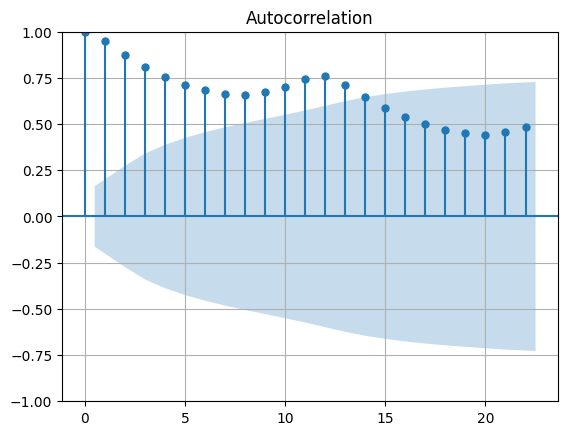

In [6]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['values'])
plt.grid()
plt.show()

# собираем датасет

In [7]:
display( df.index.min(), df.index.max(), )

Timestamp('1949-01-01 00:00:00')

Timestamp('1960-12-01 00:00:00')

In [8]:
df_train, df_test = df[:'1958-12'],df['1959-01':]
# df_train, df_test = df[:'2022-12'],df['2023-01':]

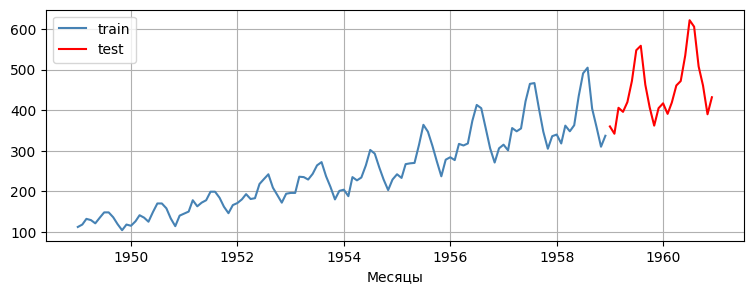

In [9]:
fig,ax = plt.subplots(figsize = (9,3))
ax.plot(df_train['values'], label = 'train', color = 'steelblue')
ax.plot(df_test['values'], label = 'test', color = 'red')
ax.set_xlabel('Месяцы', )
ax.legend(title = '', loc = 'upper left', )
ax.grid()

---

In [11]:
history_deep = 12

In [12]:
cols = [ f't{n}' for n in range(history_deep,0,-1) ]

In [13]:
df_train_ = pd.concat([ 
        df_train['values'].astype(np.float32).shift(n) 
        for n in range(history_deep,-1,-1) 
    ],axis=1)
df_train_.columns = cols + ['target']
df_train_ = df_train_.dropna()
display(df_train_ )

,t12,t11,t10,t9,t8,t7,t6,t5,t4,t3,t2,t1,target
date,,,,,,,,,,,,,
1950-01-01,112.0,118.0,132.0,129.0,121.0,135.0,148.0,148.0,136.0,119.0,104.0,118.0,115.0
1950-02-01,118.0,132.0,129.0,121.0,135.0,148.0,148.0,136.0,119.0,104.0,118.0,115.0,126.0
1950-03-01,132.0,129.0,121.0,135.0,148.0,148.0,136.0,119.0,104.0,118.0,115.0,126.0,141.0
1950-04-01,129.0,121.0,135.0,148.0,148.0,136.0,119.0,104.0,118.0,115.0,126.0,141.0,135.0
1950-05-01,121.0,135.0,148.0,148.0,136.0,119.0,104.0,118.0,115.0,126.0,141.0,135.0,125.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1958-08-01,467.0,404.0,347.0,305.0,336.0,340.0,318.0,362.0,348.0,363.0,435.0,491.0,505.0
1958-09-01,404.0,347.0,305.0,336.0,340.0,318.0,362.0,348.0,363.0,435.0,491.0,505.0,404.0
1958-10-01,347.0,305.0,336.0,340.0,318.0,362.0,348.0,363.0,435.0,491.0,505.0,404.0,359.0


In [15]:
df_test_ = pd.concat([ df_test['values'].astype(np.float32).shift(n) for n in range(history_deep,-1,-1) ],axis=1)
df_test_.columns = cols + ['target']
df_test_ = df_test_.dropna()
display(df_test_ )

,t12,t11,t10,t9,t8,t7,t6,t5,t4,t3,t2,t1,target
date,,,,,,,,,,,,,
1960-01-01,360.0,342.0,406.0,396.0,420.0,472.0,548.0,559.0,463.0,407.0,362.0,405.0,417.0
1960-02-01,342.0,406.0,396.0,420.0,472.0,548.0,559.0,463.0,407.0,362.0,405.0,417.0,391.0
1960-03-01,406.0,396.0,420.0,472.0,548.0,559.0,463.0,407.0,362.0,405.0,417.0,391.0,419.0
1960-04-01,396.0,420.0,472.0,548.0,559.0,463.0,407.0,362.0,405.0,417.0,391.0,419.0,461.0
1960-05-01,420.0,472.0,548.0,559.0,463.0,407.0,362.0,405.0,417.0,391.0,419.0,461.0,472.0
1960-06-01,472.0,548.0,559.0,463.0,407.0,362.0,405.0,417.0,391.0,419.0,461.0,472.0,535.0
1960-07-01,548.0,559.0,463.0,407.0,362.0,405.0,417.0,391.0,419.0,461.0,472.0,535.0,622.0
1960-08-01,559.0,463.0,407.0,362.0,405.0,417.0,391.0,419.0,461.0,472.0,535.0,622.0,606.0
1960-09-01,463.0,407.0,362.0,405.0,417.0,391.0,419.0,461.0,472.0,535.0,622.0,606.0,508.0


# обучаем модель

In [16]:
from sklearn.preprocessing import PolynomialFeatures

degree = 2

target = df_train_[['target']].values

poly =  PolynomialFeatures( 
        degree=degree, 
        #interaction_only=False, 
        interaction_only=True, 
        include_bias=True,
    ).fit( df_train_[cols].values )

x = poly.transform( df_train_[cols].values   )

display( x.shape, target.shape )

(108, 79)

(108, 1)

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x,target)

In [18]:
df_train_['regr']  = model.predict(x)

# тестируем

In [19]:
df_test_['regr']  = model.predict( poly.transform( df_test_[cols].values ) )

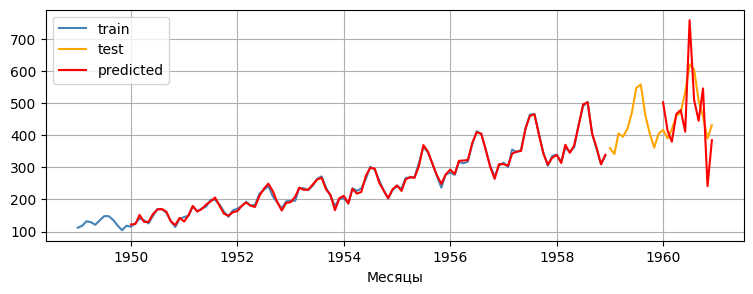

In [20]:
fig,ax = plt.subplots(figsize = (9,3))
ax.plot(df_train['values'], label = 'train', color = 'steelblue')
ax.plot(df_test['values'], label = 'test', color = 'orange')
ax.plot(df_train_['regr'], label = 'predicted', color = 'red')
ax.plot(df_test_['regr'], label = '', color = 'red')

ax.set_xlabel('Месяцы', )
ax.legend(title = '', loc = 'upper left', )
ax.grid()

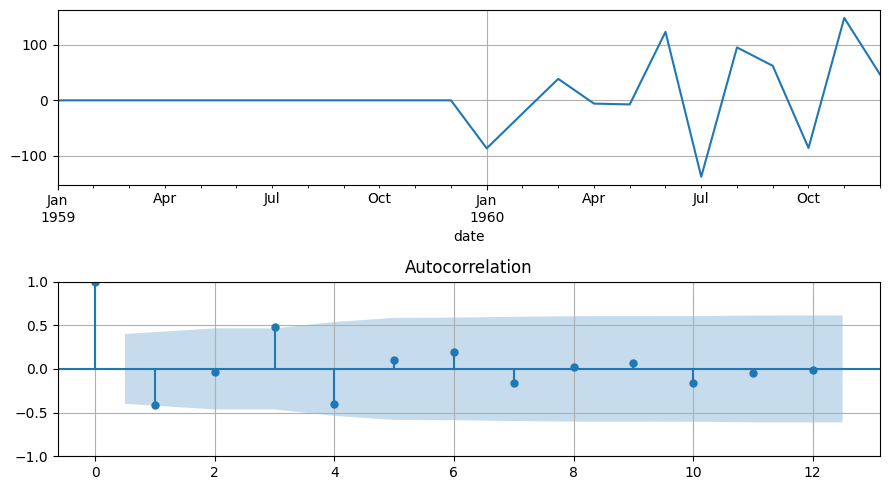

In [21]:
# остатки
#err = (df_train['values']-df_train_['regr']).fillna(0.)
err = (df_test['values']-df_test_['regr']).fillna(0.)

fig,ax = plt.subplots(2,1,figsize = (9,5))
err.plot(ax=ax[0])
ax[0].grid()
plot_acf(err,ax=ax[1])
ax[1].grid()
plt.tight_layout()

## авторегрессия

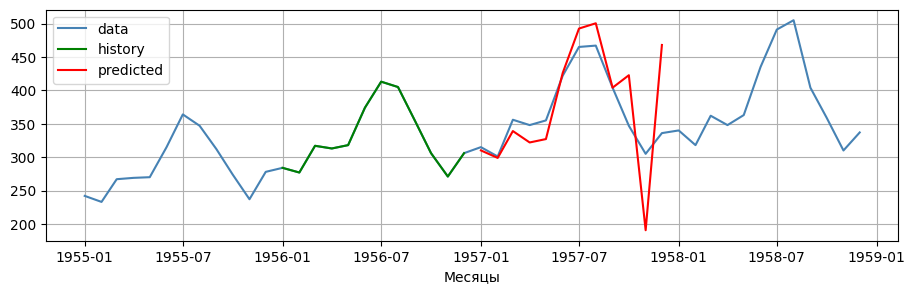

In [23]:
#start = 12*5 # train
start = 12*7 # test
n_step = 12

x = list(  df.iloc[start:start+history_deep]['values'].values )

index,predicted = [],[]

for n in range(n_step):
    index.append( df.iloc[start+history_deep+n].name)
    predicted.append( model.predict( poly.transform( np.array([x]) ) ).flatten()[0] )
    x.append( predicted[-1] )
    x = x[1:]
    
started = df.iloc[start:start+history_deep]
predicted_ = pd.Series( 
        predicted, 
        index=index, 
        name='values'
    )    

fig,ax = plt.subplots(figsize = (11,3))
ax.plot(df.iloc[start-history_deep: start+history_deep+n_step*2 ]['values'], label = 'data', color = 'steelblue')
ax.plot(started, label = 'history', color = 'green')
ax.plot(predicted_, label = 'predicted', color = 'red')
ax.set_xlabel('Месяцы', )
ax.legend(title = '', loc = 'upper left', )
ax.grid()